<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/6_Serie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Descargaremos el dataset que esta dividido en dos partes, para posteriormente concatanarlo y trabajar sobre él.

In [1]:
# Primero debemos descargar las librerias que sabemos que vamos a utulizar, aunque posteriormente descargaremos otras.
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Descargamos el dataset desde la plataforma github
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-07 18:56:09--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  47.0MB/s    in 0.4s    

2021-07-07 18:56:10 (47.0 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-07 18:56:10--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  47.8MB/s    in 0.4s    

2021-07-07 18:56:10 (47.8 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
#Es necesario convertir los dos dataset en Pandas DataFrame para poder trabajar sobre ellos
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
# Concatenamos nuestos dos Dataframe para conseguir el dataset completo 
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
#borramos las columnas erroneas que no pertenecen al data set inicial
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [8]:
df = df.reset_index(drop=True)

In [9]:
TSdf= df[['PrecioTotal','InvoiceDate']]
TSdf

,PrecioTotal,InvoiceDate
0,15.30,2010-12-01 08:26:00
1,20.34,2010-12-01 08:26:00
2,22.00,2010-12-01 08:26:00
3,20.34,2010-12-01 08:26:00
4,20.34,2010-12-01 08:26:00
...,...,...
397919,10.20,2011-12-09 12:50:00
397920,12.60,2011-12-09 12:50:00
397921,16.60,2011-12-09 12:50:00
397922,16.60,2011-12-09 12:50:00


In [10]:
TSdf['InvoiceDate'] = pd.to_datetime(TSdf['InvoiceDate'])
TSdf["hour"]=TSdf["InvoiceDate"].dt.strftime("%d/%m/%Y %H:%M")
TSdf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PrecioTotal,InvoiceDate,hour
0,15.30,2010-12-01 08:26:00,01/12/2010 08:26
1,20.34,2010-12-01 08:26:00,01/12/2010 08:26
2,22.00,2010-12-01 08:26:00,01/12/2010 08:26
3,20.34,2010-12-01 08:26:00,01/12/2010 08:26
4,20.34,2010-12-01 08:26:00,01/12/2010 08:26
...,...,...,...
397919,10.20,2011-12-09 12:50:00,09/12/2011 12:50
397920,12.60,2011-12-09 12:50:00,09/12/2011 12:50
397921,16.60,2011-12-09 12:50:00,09/12/2011 12:50
397922,16.60,2011-12-09 12:50:00,09/12/2011 12:50


In [11]:
TSdf= TSdf.groupby('hour').sum().reset_index()
TSdf

,hour,PrecioTotal
0,01/02/2011 08:23,312.90
1,01/02/2011 08:31,797.77
2,01/02/2011 09:01,234.47
3,01/02/2011 09:36,409.50
4,01/02/2011 09:38,698.60
...,...,...
17281,31/10/2011 15:30,103.32
17282,31/10/2011 15:36,295.70
17283,31/10/2011 16:02,462.85
17284,31/10/2011 16:24,997.30


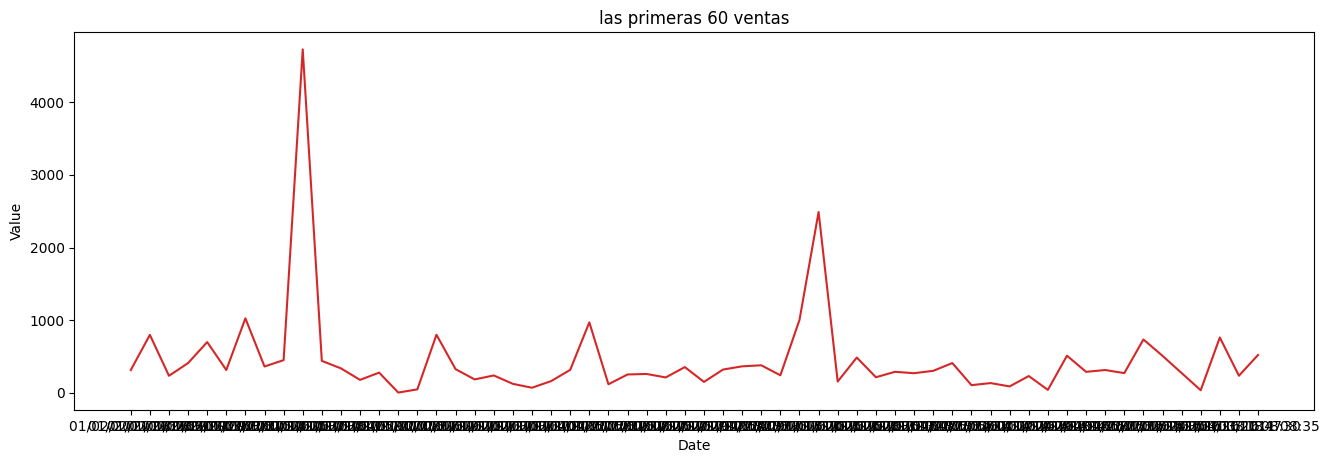

In [22]:
import matplotlib.pyplot as plt

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(TSdf.iloc[:60], x=TSdf.iloc[:60,0].values, y=TSdf.iloc[:60,1].values, title='las primeras 60 ventas') 

In [11]:
# Lagged values
for h in [24,48,168]:
  dfh[f"gap-{h}"]=dfh["Global_active_power"].shift(h)
 
# Seasonal features: We will add daily, weekly and yearly season
# sin(2*pi*x/period)
for period in [24,24*7,24*365]:
  dfh[f"s-{period}"]=np.sin(2*np.pi*np.arange(len(dfh))/period)
  dfh[f"c-{period}"]=np.cos(2*np.pi*np.arange(len(dfh))/period)
 
dfh=dfh.dropna()
dfh

In [15]:
type(df)

pandas.core.frame.DataFrame

In [16]:
df

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677
